#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [25]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [26]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [27]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [28]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [29]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [31]:
model = Sequential()

In [32]:
#卷積層1

In [33]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [34]:
model.add(Dropout(rate=0.25))

In [35]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [36]:
#卷積層2與池化層2

In [37]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [38]:
model.add(Dropout(0.25))

In [39]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [41]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [42]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [43]:
model.add(Dense(10, activation='softmax'))

In [44]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [45]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [48]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [49]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.3255 - accuracy: 0.9000 - val_loss: 0.3228 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 41s 1ms/step - loss: 0.3216 - accuracy: 0.9000 - val_loss: 0.3205 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.3182 - accuracy: 0.9000 - val_loss: 0.3178 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.3141 - accuracy: 0.9000 - val_loss: 0.3142 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.3087 - accuracy: 0.9000 - val_loss: 0.3097 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 43s 1ms/step - loss: 0.3033 - accuracy: 0.9000 - val_loss: 0.3

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

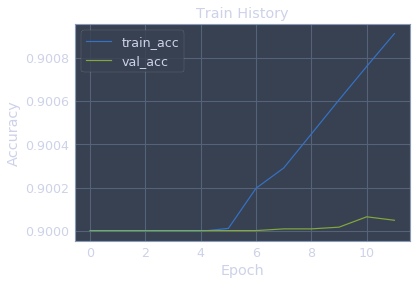

In [51]:
show_train_history('accuracy','val_accuracy')

In [52]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [53]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0813 - accuracy: 0.3072 - val_loss: 0.0826 - val_accuracy: 0.3310
Epoch 2/12
37500/37500 [==============================] - 41s 1ms/step - loss: 0.0811 - accuracy: 0.3086 - val_loss: 0.0824 - val_accuracy: 0.3326
Epoch 3/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.0810 - accuracy: 0.3093 - val_loss: 0.0823 - val_accuracy: 0.3335
Epoch 4/12
37500/37500 [==============================] - 43s 1ms/step - loss: 0.0809 - accuracy: 0.3118 - val_loss: 0.0822 - val_accuracy: 0.3343
Epoch 5/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.0807 - accuracy: 0.3125 - val_loss: 0.0820 - val_accuracy: 0.3382
Epoch 6/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.0806 - accuracy: 0.3142 - val_loss: 0.0819 - val_accuracy: 0.3390
Epoch 7/12
37500/37500 [==============================] - 42s 1ms/st

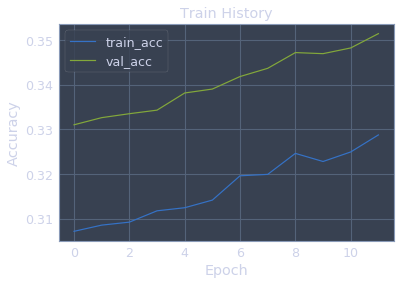

In [54]:
show_train_history('accuracy','val_accuracy')

In [55]:
! jupyter nbconvert --to html Day_071-使用損失函數.ipynb Day_071-使用損失函數_HW.ipynb

[NbConvertApp] Converting notebook Day_071-使用損失函數.ipynb to html
[NbConvertApp] Writing 394649 bytes to Day_071-使用損失函數.html
[NbConvertApp] Converting notebook Day_071-使用損失函數_HW.ipynb to html
[NbConvertApp] Writing 417866 bytes to Day_071-使用損失函數_HW.html
